<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keras-applications" data-toc-modified-id="Keras-applications-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Keras applications</a></span></li><li><span><a href="#TensorFlow-Hub" data-toc-modified-id="TensorFlow-Hub-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>TensorFlow Hub</a></span></li><li><span><a href="#AlexNet-CNN-Architecture-on-Tensorflow-(beginner)" data-toc-modified-id="AlexNet-CNN-Architecture-on-Tensorflow-(beginner)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AlexNet CNN Architecture on Tensorflow (beginner)</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Model-Implementation" data-toc-modified-id="Model-Implementation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model Implementation</a></span></li><li><span><a href="#Convolutional-layer:" data-toc-modified-id="Convolutional-layer:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Convolutional layer:</a></span></li><li><span><a href="#Batch-Normalisation-layer:" data-toc-modified-id="Batch-Normalisation-layer:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Batch Normalisation layer:</a></span></li><li><span><a href="#MaxPooling-layer:" data-toc-modified-id="MaxPooling-layer:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>MaxPooling layer:</a></span></li><li><span><a href="#Flatten-layer:" data-toc-modified-id="Flatten-layer:-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Flatten layer:</a></span></li><li><span><a href="#Dense-Layer:" data-toc-modified-id="Dense-Layer:-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Dense Layer:</a></span></li><li><span><a href="#Training-and-Results" data-toc-modified-id="Training-and-Results-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Training and Results</a></span></li><li><span><a href="#Loss-function:" data-toc-modified-id="Loss-function:-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Loss function:</a></span></li><li><span><a href="#Optimization-Algorithm:" data-toc-modified-id="Optimization-Algorithm:-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Optimization Algorithm:</a></span></li><li><span><a href="#Learning-Rate:" data-toc-modified-id="Learning-Rate:-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Learning Rate:</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Result</a></span></li></ul></li></ul></div>

One of the nice things about transfer learning is that it is possible to reuse pretrained
networks to save time and resources. There are many collections of ready-to-use
networks out there, but the following two are the most used.
# Keras applications
Keras applications include models for image classification with weights
trained on ImageNet (Xception, VGG16, VGG19, ResNet, ResNetV2, ResNeXt,
InceptionV3, InceptionResNetV2, MobileNet, MobileNetV2, DenseNet, and
NASNet)

# TensorFlow Hub
TensorFlow Hub (https://www.tensorflow.org/hub) is an alternative collection
of pretrained models. 

In [1]:
!pip install tensorflow_hub

In [2]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image


classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

IMAGE_SHAPE = (224, 224)

# wrap the hub to work with tf.keras

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper = np.array(grace_hopper)/255.0
result = classifier.predict(grace_hopper[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)
print (predicted_class)

653


# AlexNet CNN Architecture on Tensorflow (beginner)

One of the first convolutional networks was AlexNet [4], which consisted of only
eight layers; the first five were convolutional ones with max-pooling layers, and the
last three were fully connected. AlexNet [4] is an article cited more than 35,000 times,
which started the deep learning revolution (for computer vision). Then, networks
started to become deeper and deeper. Recently, a new idea has been proposed.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
(train_images.shape, train_labels.shape), (test_images.shape, test_labels.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In order to reference the class names of the images during the visualization stage, a python list containing the classes is initialized with the variable name CLASS_NAMES.



In [4]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

TensorFlow provides a suite of functions and operations that enables easy data manipulation and modification through a defined input pipeline.

To be able to access these methods and procedures, it is required that we transform our dataset into an efficient data representation TensorFlow is familiar with. This is achieved using the tf.data.Dataset API.

More specifically, tf.data.Dataset.from_tensor_slices method takes the train, test, and validation dataset partitions and returns a corresponding TensorFlow Dataset representation.

In [5]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

## Preprocessing
Usually, preprocessing is conducted to ensure the data utilized is within an appropriate format.

First, let’s visualize the images within the CIFAR-10 dataset.

The CIFAR-10 images have small dimensions, which makes visualization of the actual pictures a bit difficult.

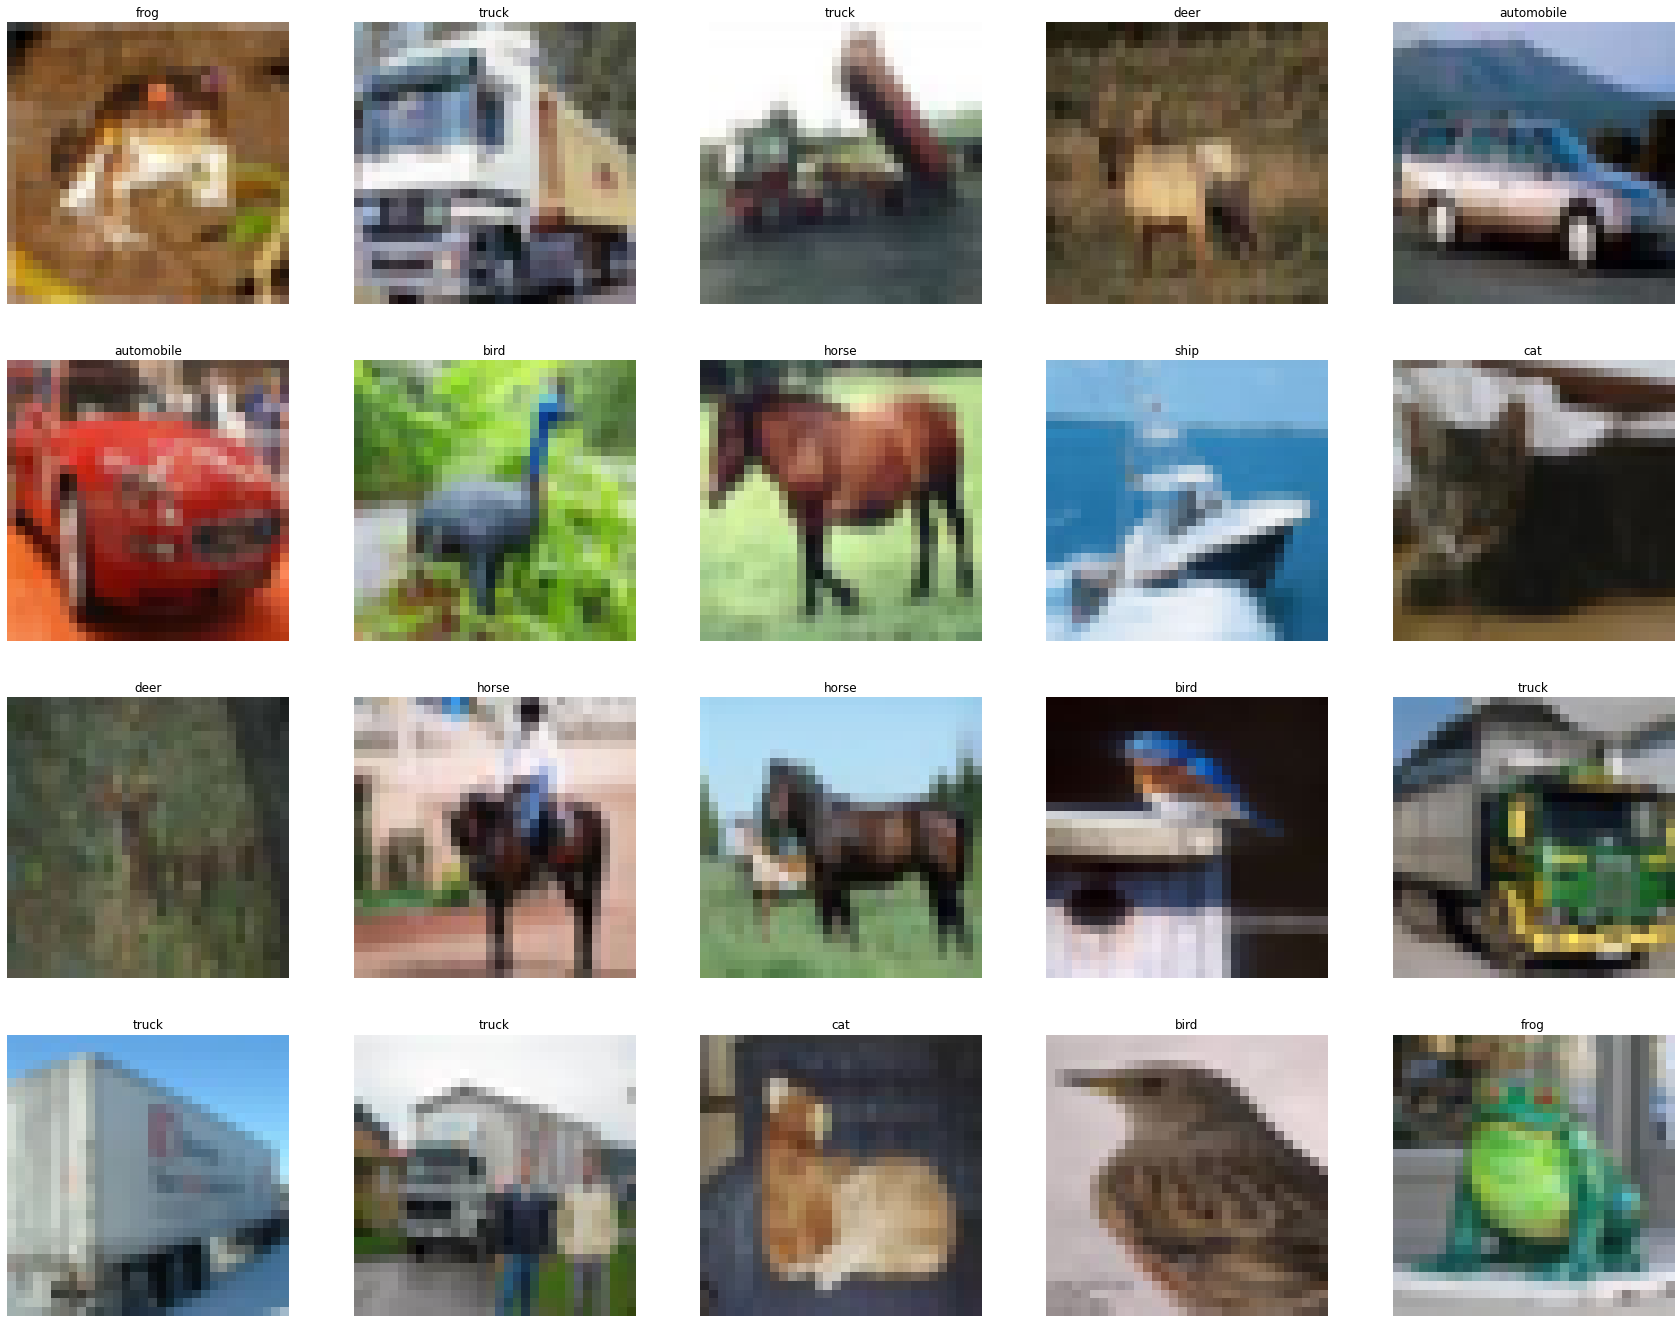

In [6]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

We’ll create a function called process_images.

This function will perform all preprocessing work that we require for the data. This function is called further down the machine learning workflow.

In [7]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

In [8]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


For our basic input/data pipeline, we will conduct three primary operations:
1. Preprocessing the data within the dataset
2. Shuffle the dataset
3. Batch data within the dataset

In [9]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


## Model Implementation
Within this section, we will implement the AlexNet CNN architecture from scratch. Through the utilization of Keras Sequential API, we can implement consecutive neural network layers within our models that are stacked against each other.

Here are the types of layers the AlexNet CNN architecture is composed of, along with a brief description:

## Convolutional layer:
A convolution is a mathematical term that describes a dot product multiplication between two sets of elements. Within deep learning the convolution operation acts on the filters/kernels and image data array within the convolutional layer. Therefore a convolutional layer is simply a layer the houses the convolution operation that occurs between the filters and the images passed through a convolutional neural network.

## Batch Normalisation layer:
Batch Normalization is a technique that mitigates the effect of unstable gradients within a neural network through the introduction of an additional layer that performs operations on the inputs from the previous layer. The operations standardize and normalize the input values, after that the input values are transformed through scaling and shifting operations.

## MaxPooling layer:
Max pooling is a variant of sub-sampling where the maximum pixel value of pixels that fall within the receptive field of a unit within a sub-sampling layer is taken as the output. The max-pooling operation below has a window of 2x2 and slides across the input data, outputting an average of the pixels within the receptive field of the kernel.

## Flatten layer:
Takes an input shape and flattens the input image data into a one-dimensional array.

## Dense Layer:
A dense layer has an embedded number of arbitrary units/neurons within. Each neuron is a perceptron.

The code snippet represents the Keras implementation of the AlexNet CNN architecture.

In [10]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10,activation='softmax')  
    
    
])

## Training and Results
To train the network, we have to compile it.

The compilation processes involve specifying the following items:

##  Loss function:
A method that quantifies ‘how well’ a machine learning model performs. The quantification is an output(cost) based on a set of inputs, which are referred to as parameter values. The parameter values are used to estimate a prediction, and the ‘loss’ is the difference between the predictions and the actual values.

##  Optimization Algorithm:
An optimizer within a neural network is an algorithmic implementation that facilitates the process of gradient descent within a neural network by minimizing the loss values provided via the loss function. To reduce the loss, it is paramount the values of the weights within the network are selected appropriately.

##  Learning Rate:
An integral component of a neural network implementation detail as it’s a factor value that determines the level of updates that are made to the values of the weights of the network. Learning rate is a type of hyperparameter.

We can also provide a summary of the network to have more insight into the layer composition of the network by running the model.summary() function.

In [11]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 128)       46592     
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         819456    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 256)         1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 256)        

In [13]:
history=model.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
    validation_freq=1,
    verbose = 1
)

Epoch 1/50
1562/1562 [==============================] - 30s 19ms/step - loss: 2.1703 - accuracy: 0.2347 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
1562/1562 [==============================] - 26s 17ms/step - loss: 1.7979 - accuracy: 0.3482 - val_loss: 1.5462 - val_accuracy: 0.4533
Epoch 3/50
1562/1562 [==============================] - 27s 17ms/step - loss: 1.6492 - accuracy: 0.4015 - val_loss: 1.4575 - val_accuracy: 0.4812
Epoch 4/50
1562/1562 [==============================] - 27s 18ms/step - loss: 1.5421 - accuracy: 0.4432 - val_loss: 1.3966 - val_accuracy: 0.5053
Epoch 5/50
1562/1562 [==============================] - 28s 18ms/step - loss: 1.4508 - accuracy: 0.4762 - val_loss: 1.3231 - val_accuracy: 0.5283
Epoch 6/50
1562/1562 [==============================] - 28s 18ms/step - loss: 1.3727 - accuracy: 0.5079 - val_loss: 1.2967 - val_accuracy: 0.5446
Epoch 7/50
1562/1562 [==============================] - 27s 18ms/step - loss: 1.2992 - accuracy: 0.5367 - val_loss: 

In [15]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Result

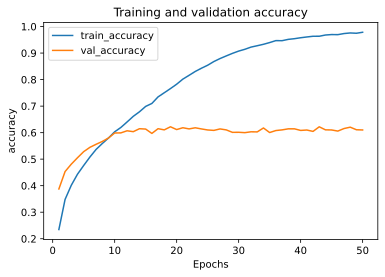

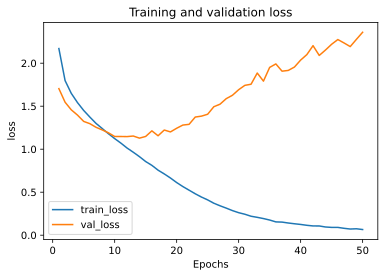

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    

plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

In [25]:
print('val_accuracy Score = ',np.max(history.history['val_accuracy']))

val_accuracy Score =  0.62209535


In [26]:
print('Accuracy Score = ',np.max(history.history['accuracy']))

Accuracy Score =  0.9784131


In [27]:
print('loss Score = ',np.max(history.history['loss']))

loss Score =  2.1702552628578204


In [28]:
print('val_loss Score = ',np.max(history.history['val_loss']))

val_loss Score =  2.3597128223150206
